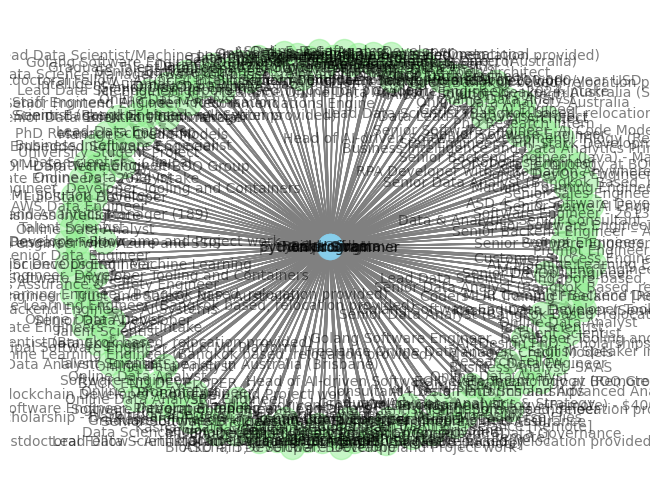

In [3]:
import json
import pandas as pd
import networkx as nx

with open("profile.json", "r") as json_file:
    user_data = json.load(json_file)

job_data = pd.read_csv("job_data1.csv")

G = nx.DiGraph()

for user in user_data:
    user_url = user['url']
    G.add_node(user_url, node_type='user', name=user['name'], location=user['location'])

for index, row in job_data.iterrows():
    job_url = row['job_detail_url']
    G.add_node(job_url, node_type='job', job_title=row['job_title'], company_name=row['company_name'], location=row['company_location'])

for user in user_data:
    for index, row in job_data.iterrows():
        interaction_type = 'applied'  # Define the interaction type as needed
        G.add_edge(user['url'], row['job_detail_url'], interaction_type=interaction_type)
        
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G, k=0.1) 
user_nodes = [node for node in G.nodes if G.nodes[node]['node_type'] == 'user']
job_nodes = [node for node in G.nodes if G.nodes[node]['node_type'] == 'job']
nx.draw(G, pos, with_labels=True, node_size=300, nodelist=user_nodes, node_color='skyblue', edgelist=G.edges(user_nodes), edge_color='gray', alpha=0.5, labels={node: G.nodes[node]['name'] for node in user_nodes}, font_size=10, font_color='black')
nx.draw(G, pos, with_labels=True, node_size=300, nodelist=job_nodes, node_color='lightgreen', edgelist=G.edges(job_nodes), edge_color='gray', alpha=0.5, labels={node: G.nodes[node]['job_title'] for node in job_nodes}, font_size=10, font_color='black')
plt.show()


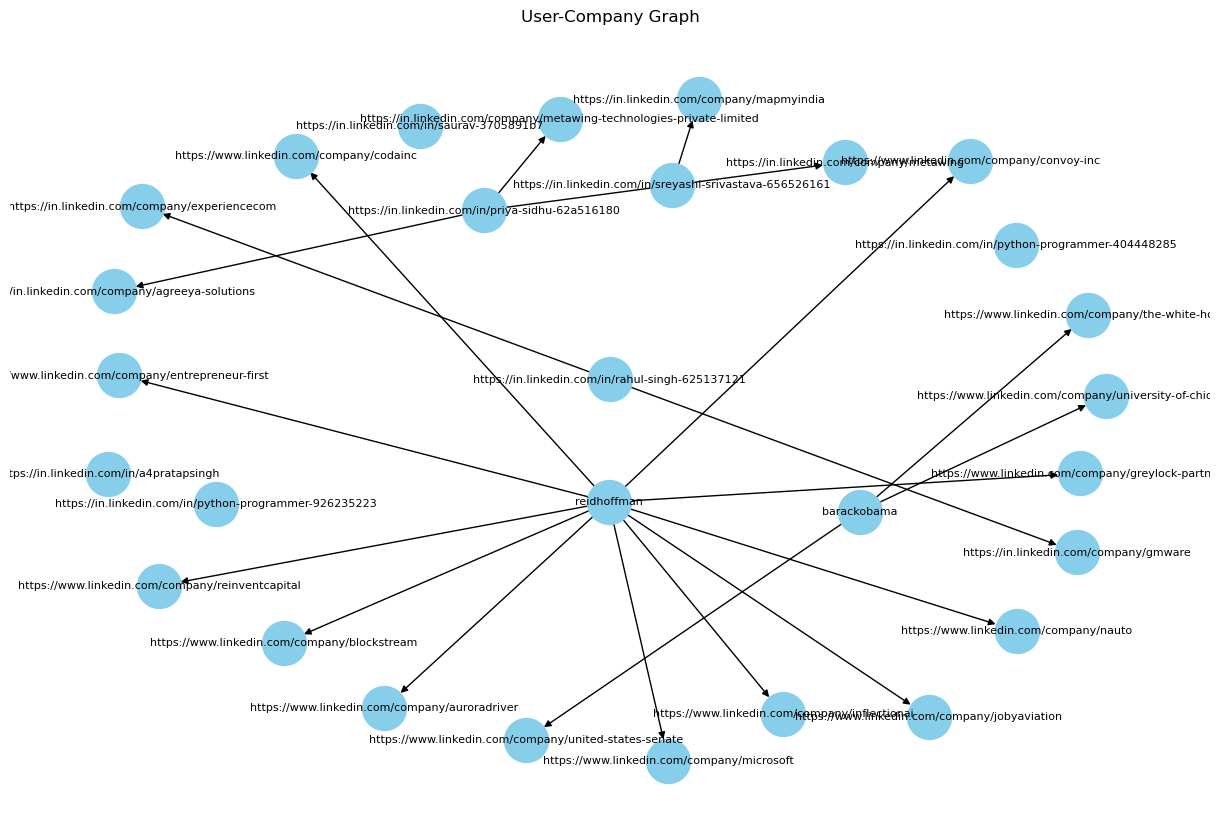

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

with open('profile.json', 'r') as json_file:
    profile_data = json.load(json_file)

user_company_graph = nx.DiGraph()

for profile in profile_data:
    user = profile["profile"]
    experiences = profile.get("experience", [])

    user_company_graph.add_node(user)

    for exp in experiences:
        company_url = exp.get("organisation_profile")
        if company_url:
           
            company_name = exp.get("description", "Unknown Company")

            user_company_graph.add_node(company_url, type="company", name=company_name)
            user_company_graph.add_edge(user, company_url)


pos = nx.spring_layout(user_company_graph)
plt.figure(figsize=(12, 8))
nx.draw(user_company_graph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8, font_color="black", node_shape="o")
plt.title("User-Company Graph")
plt.show()


In [5]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade networkx

     ---------------------------------------- 2.1/2.1 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install python-louvain

     -------------------------------------- 204.6/204.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9395 sha256=24e77673ca692f7e8104928b61ef06caee93df19ddb0652b23568ff837007ec9
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


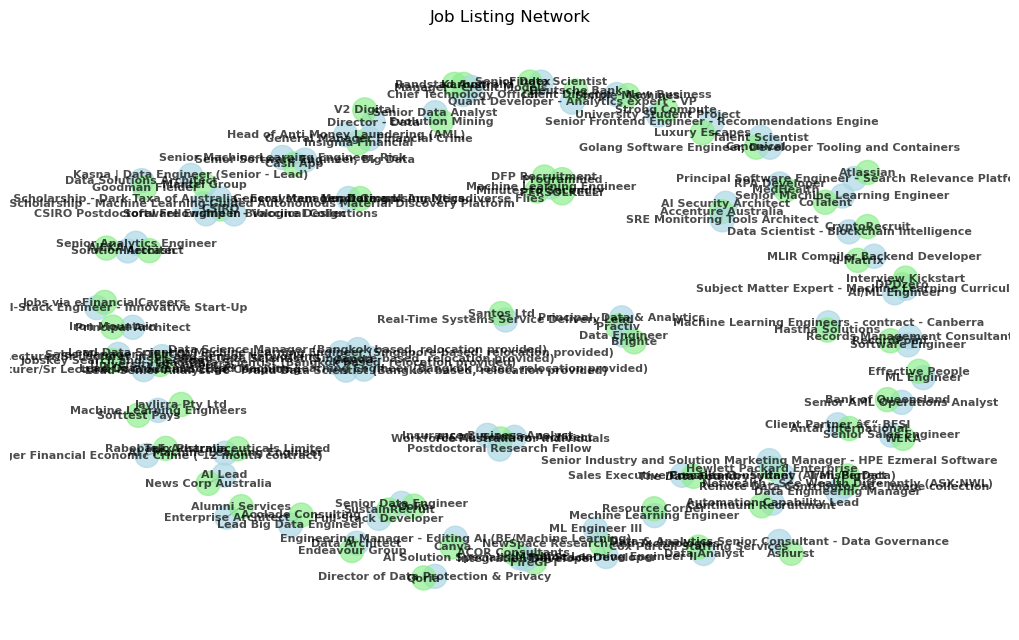

In [165]:
import networkx as nx
import matplotlib.pyplot as plt

with open('jobs4.json', 'r') as json_file:
    job_listings = json.load(json_file)

job_listing_network = nx.Graph()

for job in job_listings:
    job_listing_network.add_node(job["job_title"], node_type="job")
    job_listing_network.add_node(job["company_name"], node_type="company")

for job in job_listings:
    job_listing_network.add_edge(job["company_name"], job["job_title"])

node_colors = {
    node: "lightblue" if job_listing_network.nodes[node]["node_type"] == "job" else "lightgreen"
    for node in job_listing_network.nodes
}

pos = nx.spring_layout(job_listing_network)
plt.figure(figsize=(10, 6))
nx.draw(
    job_listing_network,
    pos,
    with_labels=True,
    node_color=[node_colors[node] for node in job_listing_network.nodes],
    font_size=8,
    node_size=300,
    font_color="black",
    font_weight="bold",
    alpha=0.7,
)

plt.title("Job Listing Network")
plt.show()


In [177]:
import networkx as nx
from community import best_partition

job_network = nx.Graph()

with open('jobs4.json', 'r') as json_file:
    job_data = json.load(json_file)

for job in job_data:
    job_network.add_node(job["company_name"])
    job_network.add_node(job["job_title"])
    job_network.add_edge(job["company_name"], job["job_title"])

company_degrees = dict(job_network.degree(job_data[i]["company_name"] for i in range(len(job_data))))

communities = best_partition(job_network)

for node, community_id in communities.items():
    job_network.nodes[node]["community"] = community_id

community_job_titles = {}
for node, data in job_network.nodes(data=True):
        community_id = data.get("community", -1)
        if community_id not in community_job_titles:
            community_job_titles[community_id] = []
        community_job_titles[community_id].append(node)
print("Community Job Titles:")
for community_id, titles in community_job_titles.items():
    print(f"Community {community_id}: {titles}")


Community Job Titles:
Community 0: ['Effective People', 'ML Engineer']
Community 1: ['DPDzero', 'AI/ML Engineer']
Community 2: ['Minutes to Seconds', 'Machine Learning Engineer', 'DFP Recruitment', 'PERSOLKELLY', 'Programmed']
Community 3: ['Telix Pharmaceuticals Limited', 'AI / Machine Learning Engineer']
Community 4: ['Jaylirra Pty Ltd', 'Machine Learning Engineers', 'Softtest Pays']
Community 5: ['Cox Purtell Staffing Services', 'Data Analyst']
Community 6: ['CryptoRecruit', 'Data Scientist - Blockchain Intelligence']
Community 7: ['NewSpace Research and Technologies', 'Machine Learning Engineer II', 'ML Engineer III']
Community 8: ['CoTalent', 'Senior Machine Learning Engineer']
Community 9: ['MedHealth', 'RPA Developer']
Community 10: ['Workforce Australia for Individuals', 'AI&ML Solution Architect', 'Postdoctoral Research Fellow', 'Insurance Business Analyst']
Community 11: ['Hastha Solutions', 'Machine Learning Engineers - contract - Canberra']
Community 12: ['Lendi Group', 'Ge

In [178]:
from collections import Counter
community_sizes = Counter(communities.values())

most_common_community = max(community_sizes, key=community_sizes.get)

print(f"Most common community: Community {most_common_community} with {community_sizes[most_common_community]} nodes.")

Most common community: Community 33 with 7 nodes.


In [179]:

keyword = "AI"
community = []

communities_with_keyword = []

for community_id, titles in community_job_titles.items():
    for title in titles:
        if keyword.lower() in title.lower():
            communities_with_keyword.append(community_id)
            break  
print(f"Number of communities with '{keyword}' in job titles: {len(communities_with_keyword)}")

print("Community IDs with the keyword:")
for community_id in communities_with_keyword:
    community.append(community_id)
    print(f"Community {community_id}: {', '.join(community_job_titles[community_id])}")
print("--------------------------------------------------------------------------------------------------------------------")    

keyword = "data"

communities_with_keyword = []

for community_id, titles in community_job_titles.items():
    for title in titles:
        if keyword.lower() in title.lower():
            communities_with_keyword.append(community_id)
            break  
print(f"Number of communities with '{keyword}' in job titles: {len(communities_with_keyword)}")

print("Community IDs with the keyword:")
for community_id in communities_with_keyword:
    community.append(community_id)
    print(f"Community {community_id}: {', '.join(community_job_titles[community_id])}")

print("--------------------------------------------------------------------------------------------------------------------")    

keyword = "machine learning"

communities_with_keyword = []

for community_id, titles in community_job_titles.items():
    for title in titles:
        if keyword.lower() in title.lower():
            communities_with_keyword.append(community_id)
            break  
print(f"Number of communities with '{keyword}' in job titles: {len(communities_with_keyword)}")

print("Community IDs with the keyword:")
for community_id in communities_with_keyword:
    community.append(community_id)
    print(f"Community {community_id}: {', '.join(community_job_titles[community_id])}")

Number of communities with 'AI' in job titles: 12
Community IDs with the keyword:
Community 1: DPDzero, AI/ML Engineer
Community 3: Telix Pharmaceuticals Limited, AI / Machine Learning Engineer
Community 6: CryptoRecruit, Data Scientist - Blockchain Intelligence
Community 10: Workforce Australia for Individuals, AI&ML Solution Architect, Postdoctoral Research Fellow, Insurance Business Analyst
Community 17: Canonical, Talent Scientist, Golang Software Engineer, Developer Tooling and Containers
Community 18: Canva, Engineering Manager - Editing AI (BE/Machine Learning)
Community 24: News Corp Australia, AI Lead
Community 28: Hewlett Packard Enterprise, Presales Consultant (AI/ML/BigData), Senior Industry and Solution Marketing Manager - HPE Ezmeral Software
Community 29: FireGPT, AI Solution Specialist - Full Stack Developer
Community 32: Oolio, Senior Data Engineer, SustainRecruit, Full-Stack Developer
Community 56: Accenture Australia, AI Security Architect, SRE Monitoring Tools Archi

In [135]:

keyword = "customer service"

communities_with_keyword = []

for community_id, titles in community_job_titles.items():
    for title in titles:
        if keyword.lower() in title.lower():
            communities_with_keyword.append(community_id)
            break  
print(f"Number of communities with '{keyword}' in job titles: {len(communities_with_keyword)}")


print("Community IDs with the keyword:")
for community_id in communities_with_keyword:
    print(f"Community {community_id}: {', '.join(community_job_titles[community_id])}")

Number of communities with 'customer service' in job titles: 2
Community IDs with the keyword:
Community 2: Sugar australia, Customer Service officer, Hanes Brands
Community 270: Workforce Australia for Individuals, Business Intelligence Specialist, AI&ML Solution Architect, Postdoctoral |Science Digital | Machine Learning, Software Engineer - 261313, BACK END DEVELOPER, Consultant – Data Platforms and Advanced Analytics, Practice Manager, Data and AI, Perth, Digital, Data, Cloud & AI - Manager to Director 100 k+, Business Analyst | Digital Transformation, Multiple Continuing (Tenure-Track) Academic Positions, School of Computer Science, Digital, Data, Cloud & AI - Consultant to Senior Consultant 60 k to 80 k, Digital, Data, Cloud & AI - Senior Consultant to Manager 80 k to 100 k, UX Designer | Digital Transformation, Developer Programmer - Sydney, Process Development Engineer, Postdoctoral | Science Digital | Software Engineering, Digital Experiences - Senior Consultant to Manager 80 

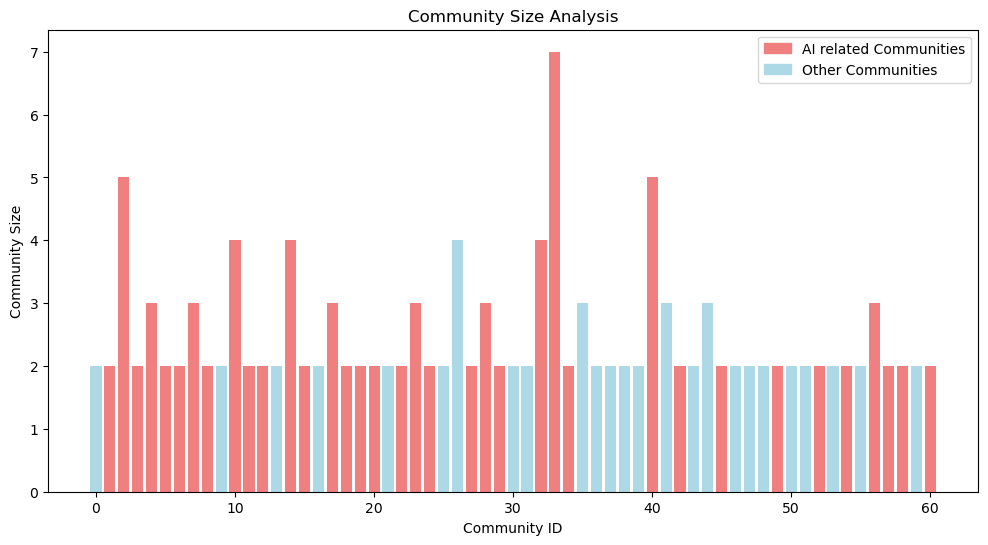

In [180]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 


community_colors = {}
color_index = 0

community_sizes = {}
for node, community_id in communities.items():
    if community_id in community:
        
        community_colors[community_id] = "lightcoral"  
    else:
      
        community_colors[community_id] = "lightblue"  


    if community_id in community_sizes:
        community_sizes[community_id] += 1
    else:
        community_sizes[community_id] = 1


community_ids = list(community_sizes.keys())
sizes = [community_sizes[community_id] for community_id in community_ids]
colors = [community_colors[community_id] for community_id in community_ids]


plt.figure(figsize=(12, 6))
bars = plt.bar(community_ids, sizes, color=colors)
plt.xlabel("Community ID")
plt.ylabel("Community Size")
plt.title("Community Size Analysis")


red_patch = mpatches.Patch(color='lightcoral', label='AI related Communities')
blue_patch = mpatches.Patch(color='lightblue', label='Other Communities')
plt.legend(handles=[red_patch, blue_patch], loc="upper right")

plt.show()


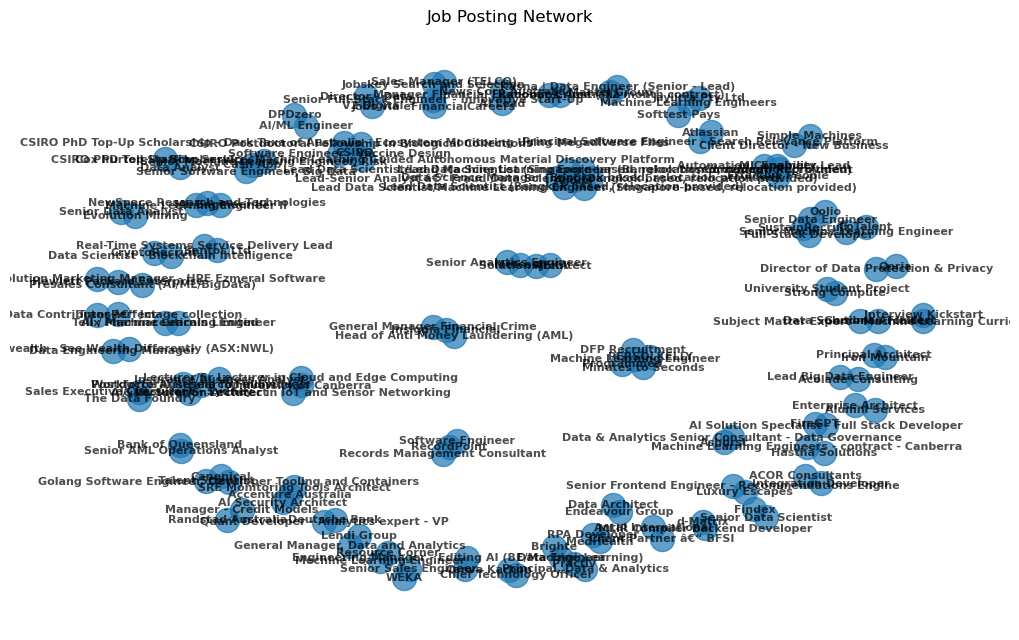

In [181]:

job_network = nx.Graph()

for job in job_data:
    job_title = job["job_title"]
    company_name = job["company_name"]

    job_network.add_node(job_title, type="job")
    job_network.add_node(company_name, type="company")
    job_network.add_edge(job_title, company_name)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(job_network, seed=0)
nx.draw(job_network, pos, with_labels=True, node_size=300, font_size=8, font_color="black", font_weight="bold", alpha=0.7)
plt.title("Job Posting Network")
plt.show()

Top 10 nodes by degree:
Agoda: Degree 6
Machine Learning Engineer: Degree 4
CSIRO: Degree 4
Workforce Australia for Individuals: Degree 3
Machine Learning Engineers: Degree 2
NewSpace Research and Technologies: Degree 2
Practiv: Degree 2
Canonical: Degree 2
Data Engineer: Degree 2
Cash App: Degree 2


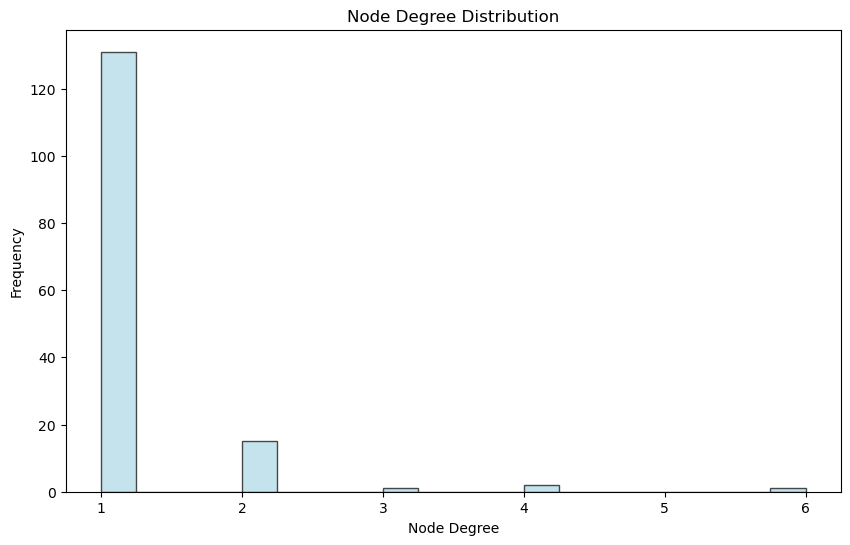

In [183]:
import networkx as nx
import matplotlib.pyplot as plt


node_degrees = dict(job_network.degree())

sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

N = 10  
print(f"Top {N} nodes by degree:")
for node, degree in sorted_nodes[:N]:
    print(f"{node}: Degree {degree}")




In [140]:

keywords = ["AI", "ML", "machine learning", "data"]

keyword_centricity = {keyword: {} for keyword in keywords}

for keyword in keywords:
    keyword_centricity[keyword] = {}  
    for community_id, titles in community_job_titles.items():
        total_titles = len(titles)
        keyword_titles = sum(1 for title in titles if keyword.lower() in title.lower())
        keyword_percentage = (keyword_titles / total_titles) * 100 if total_titles > 0 else 0
        keyword_centricity[keyword][community_id] = keyword_percentage

for keyword, ai_centricity in keyword_centricity.items():
    print(f"Communities ranked by {keyword}-centricity:")
    sorted_communities = sorted(ai_centricity.items(), key=lambda x: x[1], reverse=True)
    for community_id, percentage in sorted_communities:
        print(f"Community {community_id}: {keyword}-centricity {percentage:.2f}%")
    print()



Communities ranked by AI-centricity:
Community 273: AI-centricity 100.00%
Community 379: AI-centricity 100.00%
Community 306: AI-centricity 66.67%
Community 340: AI-centricity 66.67%
Community 12: AI-centricity 50.00%
Community 32: AI-centricity 50.00%
Community 54: AI-centricity 50.00%
Community 126: AI-centricity 50.00%
Community 180: AI-centricity 50.00%
Community 236: AI-centricity 50.00%
Community 239: AI-centricity 50.00%
Community 262: AI-centricity 50.00%
Community 263: AI-centricity 50.00%
Community 268: AI-centricity 50.00%
Community 272: AI-centricity 50.00%
Community 276: AI-centricity 50.00%
Community 287: AI-centricity 50.00%
Community 289: AI-centricity 50.00%
Community 305: AI-centricity 50.00%
Community 329: AI-centricity 50.00%
Community 330: AI-centricity 50.00%
Community 335: AI-centricity 50.00%
Community 358: AI-centricity 50.00%
Community 364: AI-centricity 50.00%
Community 393: AI-centricity 50.00%
Community 396: AI-centricity 50.00%
Community 401: AI-centricity